In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten,GlobalAveragePooling2D # Import GlobalAver
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os


In [2]:
!gdown --fuzzy "https://drive.google.com/file/d/1bbyqVCKZX5Ur5Zg-uKj0jD0maWAVeOLx/view?usp=drive_link"


Downloading...
From (original): https://drive.google.com/uc?id=1bbyqVCKZX5Ur5Zg-uKj0jD0maWAVeOLx
From (redirected): https://drive.google.com/uc?id=1bbyqVCKZX5Ur5Zg-uKj0jD0maWAVeOLx&confirm=t&uuid=a76a46b6-b573-46fe-a9ee-97c961dfb942
To: /content/CarDD_release.zip
100% 6.05G/6.05G [02:15<00:00, 44.7MB/s]


In [3]:
!unzip -q /content/CarDD_release.zip -d /content/


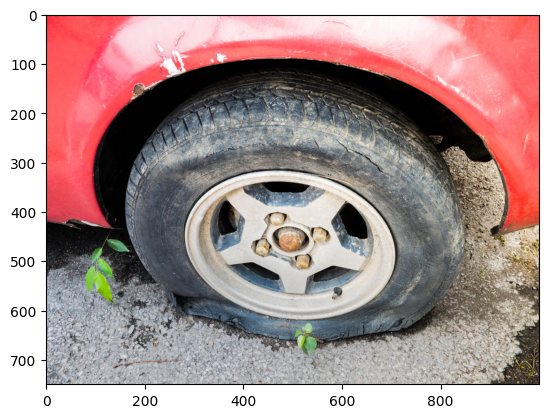

In [4]:
from tensorflow.keras.preprocessing import image

plt.imshow(image.load_img('/content/CarDD_release/CarDD_COCO/train2017/000001.jpg'))
plt.show()

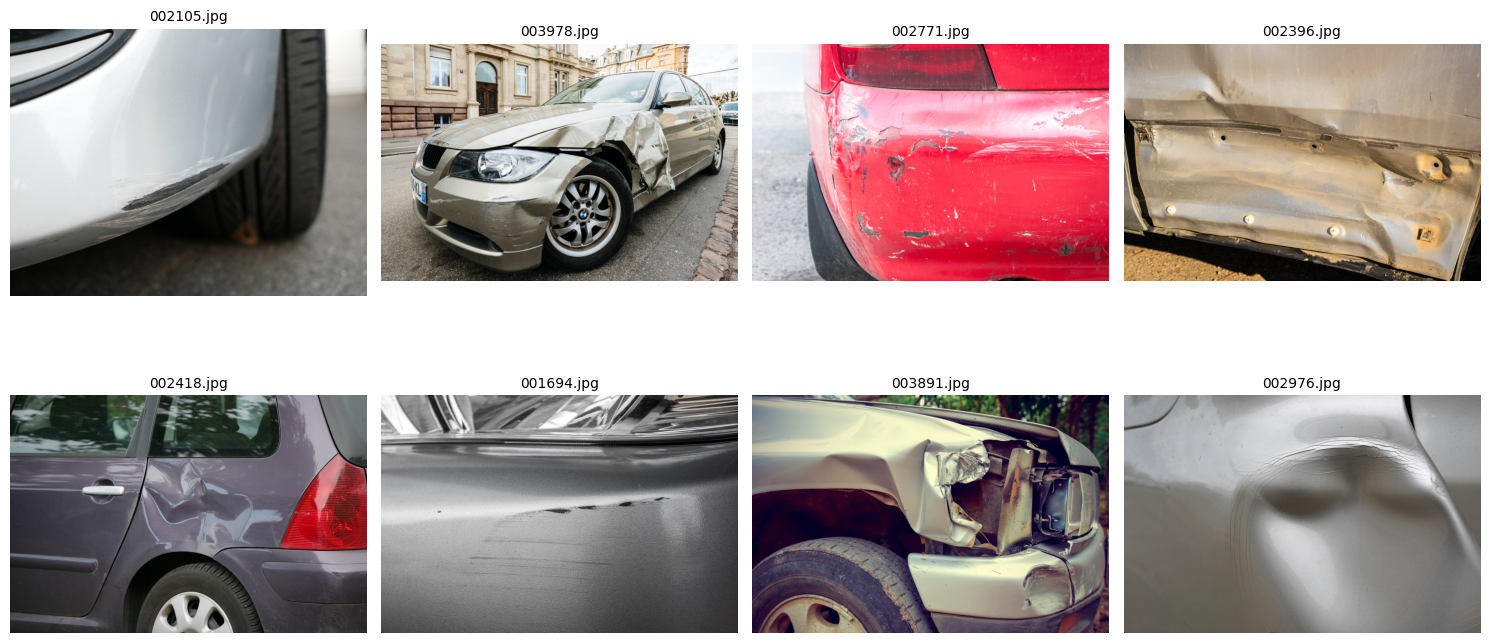

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Directory with your images
img_dir = '/content/CarDD_release/CarDD_COCO/train2017'

# Get list of image paths (first 8)
img_paths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir)[:8]]

# Set up the grid (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path)
    ax = axs[i // 4, i % 4]
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path), fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
category_map = {
    1: "dent",
    2: "scratch",
    3: "crack",
    4: "glass shatter",
    5: "lamp broken",
    6: "tire flat"
}


In [9]:
import os
import json
import shutil

# Define category mapping
categories = {
    1: 'dent',
    2: 'scratch',
    3: 'crack',
    4: 'glass_shatter',
    5: 'lamp_broken',
    6: 'tire_flat'
}

# Base paths
base_dir = '/content/CarDD_release/CarDD_COCO'
splits = {
    'train': {
        'json': os.path.join(base_dir, 'annotations', 'instances_train2017.json'),
        'img_dir': os.path.join(base_dir, 'train2017'),
        'output_dir': os.path.join(base_dir, 'train')
    },
    'val': {
        'json': os.path.join(base_dir, 'annotations', 'instances_val2017.json'),
        'img_dir': os.path.join(base_dir, 'val2017'),
        'output_dir': os.path.join(base_dir, 'val')
    },
    'test': {
        'json': os.path.join(base_dir, 'annotations', 'instances_test2017.json'),
        'img_dir': os.path.join(base_dir, 'test2017'),
        'output_dir': os.path.join(base_dir, 'test')
    }
}

# Function to organize one split
def organize_split(split_name, config):
    print(f"\nOrganizing {split_name} data...")

    # Make sure class folders exist
    if not os.path.exists(config['output_dir']):
        os.makedirs(config['output_dir'])

    for class_name in categories.values():
        class_folder = os.path.join(config['output_dir'], class_name)
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

    # Load JSON annotations
    with open(config['json'], 'r') as f:
        data = json.load(f)

    image_info = {img['id']: img['file_name'] for img in data['images']}
    annotations = data['annotations']

    # Copy images to class folders
    for annotation in annotations:
        image_id = annotation['image_id']
        category_id = annotation['category_id']
        if category_id not in categories:
            continue

        image_name = image_info[image_id]
        src = os.path.join(config['img_dir'], image_name)
        dst_dir = os.path.join(config['output_dir'], categories[category_id])
        dst = os.path.join(dst_dir, image_name)

        if os.path.exists(src):
            shutil.copy(src, dst)

    print(f"{split_name.capitalize()} data organized successfully!")

# Run for all splits
for split_name, config in splits.items():
    organize_split(split_name, config)



Organizing train data...
Train data organized successfully!

Organizing val data...
Val data organized successfully!

Organizing test data...
Test data organized successfully!


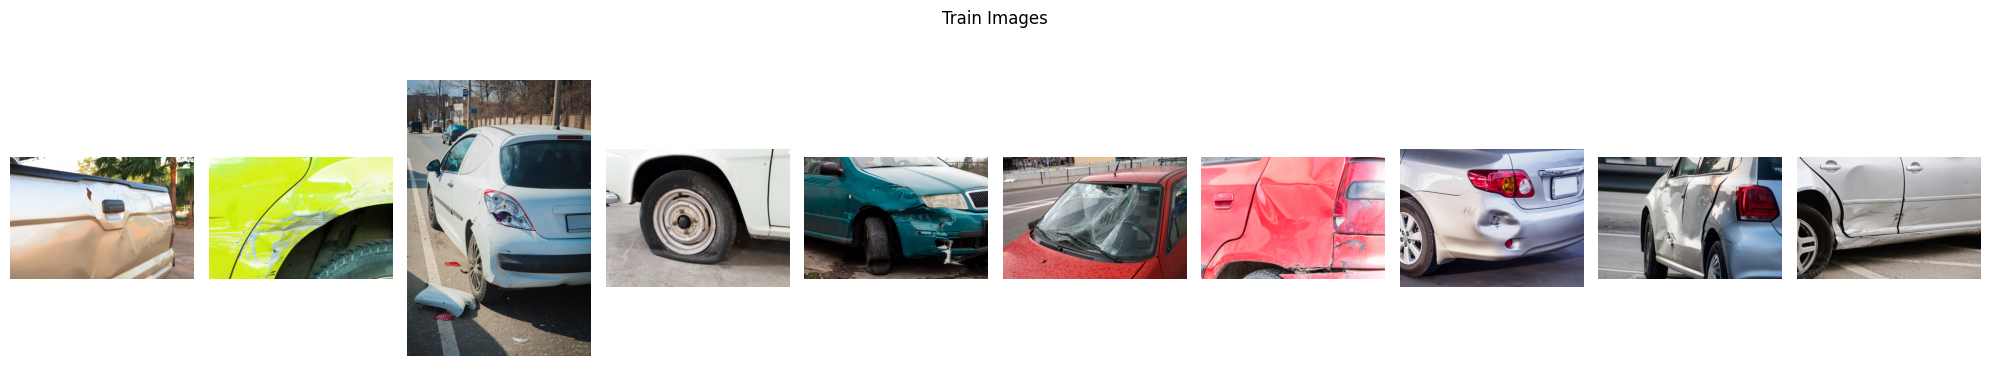

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory for organized train dataset
split_dir = '/content/CarDD_release/CarDD_COCO/train'

# Collect 10 random images
all_images = []
for class_folder in os.listdir(split_dir):
    class_path = os.path.join(split_dir, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        all_images.extend(images)

sample_images = random.sample(all_images, min(10, len(all_images)))

# Plot the 10 images
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Train Images')
plt.tight_layout()
plt.show()


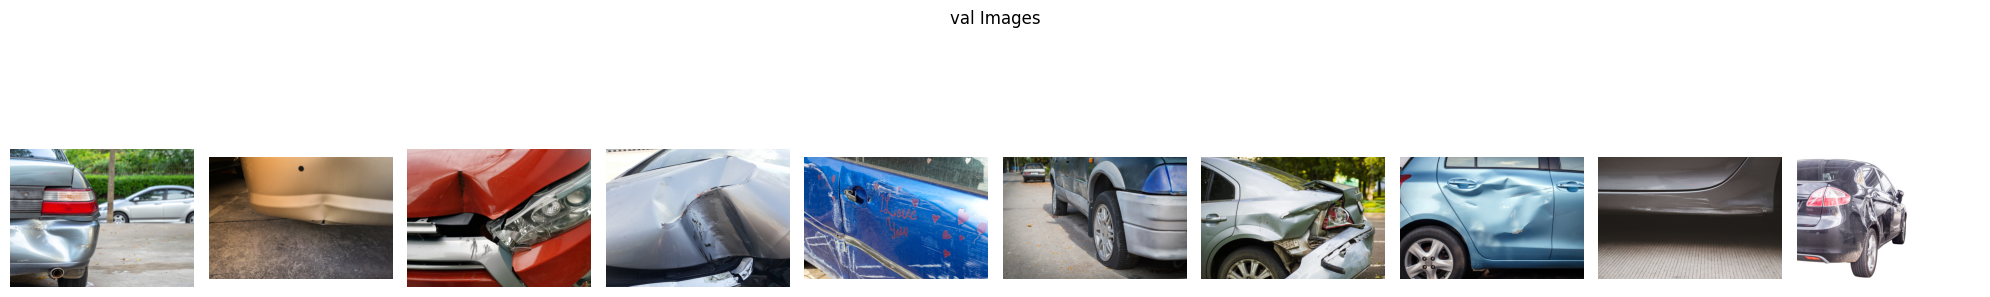

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory for organized train dataset
split_dir = '/content/CarDD_release/CarDD_COCO/val'

# Collect 10 random images
all_images = []
for class_folder in os.listdir(split_dir):
    class_path = os.path.join(split_dir, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        all_images.extend(images)

sample_images = random.sample(all_images, min(10, len(all_images)))

# Plot the 10 images
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('val Images')
plt.tight_layout()
plt.show()


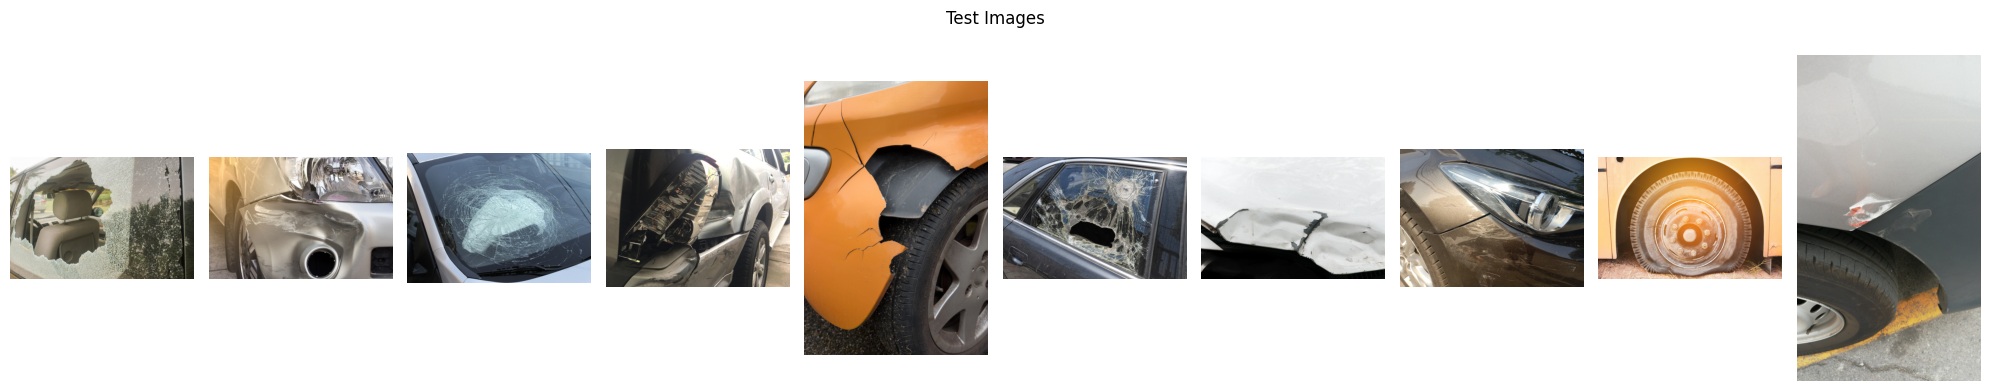

In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory for organized train dataset
split_dir = '/content/CarDD_release/CarDD_COCO/test'

# Collect 10 random images
all_images = []
for class_folder in os.listdir(split_dir):
    class_path = os.path.join(split_dir, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        all_images.extend(images)

sample_images = random.sample(all_images, min(10, len(all_images)))

# Plot the 10 images
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Test Images')
plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Augmentation for training data
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=20,
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.15,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling & preprocessing for validation and test
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Paths
train_path = '/content/CarDD_release/CarDD_COCO/train'
val_path = '/content/CarDD_release/CarDD_COCO/val'
test_path = '/content/CarDD_release/CarDD_COCO/test'

# Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 4360 images belonging to 6 classes.
Found 1237 images belonging to 6 classes.
Found 555 images belonging to 6 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Define the base ResNet50 model with pretrained weights from ImageNet, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Note: Image size is 224x224

# Freeze the base model to prevent training of its layers initially
base_model.trainable = False

# Add a custom classification head
model = models.Sequential([
    base_model,  # Add the pre-trained ResNet50 base
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce the spatial dimensions
    layers.Dense(1024, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(6, activation='softmax')  # Output layer for 6 classes (damage types)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Show the model architecture summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,692,038 (98.01 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
# Unfreeze the last few layers of the ResNet50 base model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Re-compile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]


In [17]:
model.fit(train_generator, epochs=10, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.2661 - loss: 1.9891 - val_accuracy: 0.4446 - val_loss: 1.3355
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.4069 - loss: 1.5064 - val_accuracy: 0.4956 - val_loss: 1.2008
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4432 - loss: 1.3935 - val_accuracy: 0.5263 - val_loss: 1.1604
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4565 - loss: 1.3348 - val_accuracy: 0.5303 - val_loss: 1.1402
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4853 - loss: 1.2617 - val_accuracy: 0.5327 - val_loss: 1.1183
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4883 - loss: 1.2217 - val_accuracy: 0.5416 - val_loss: 1.1096
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5251 - loss: 1.1582 - val_accuracy: 0.5441 - val_loss: 1.0956
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5059 - loss: 1.1862 - val_accu

In [22]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.2176 - loss: 2.1732 - val_accuracy: 0.4196 - val_loss: 1.4041 - learning_rate: 1.0000e-05
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.3883 - loss: 1.6124 - val_accuracy: 0.4762 - val_loss: 1.2564 - learning_rate: 1.0000e-05
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4187 - loss: 1.4664 - val_accuracy: 0.5101 - val_loss: 1.1755 - learning_rate: 1.0000e-05
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4466 - loss: 1.3820 - val_accuracy: 0.5174 - val_loss: 1.1598 - learning_rate: 1.0000e-05
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4680 - loss: 1.3010 - val_accuracy: 0.5255 - val_loss: 1.1331 - learning_rate: 1.0000e-05
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4728 - loss: 1.2823 - val_accuracy: 0.5311 - val_loss: 1.1291 - learning_rate: 1.0000e-05
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - acc

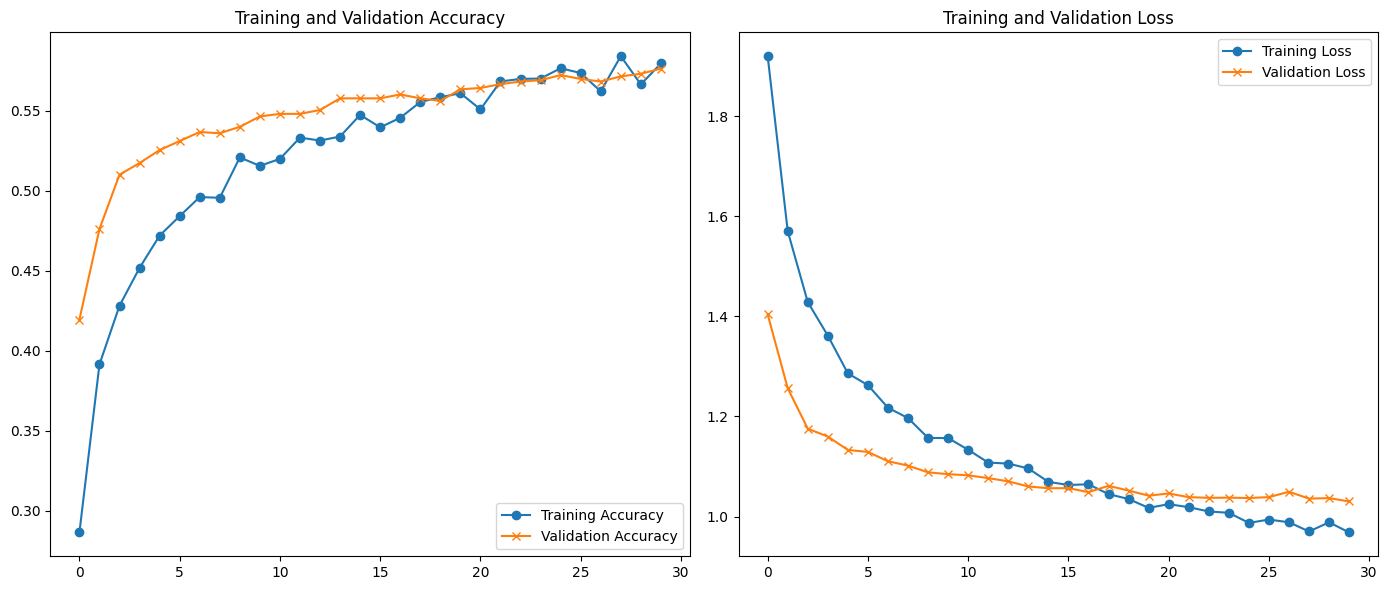

In [23]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='x')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='x')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [24]:
# Save the model in HDF5 format
model.save("car_damage_resnet50.h5")
